# Infraestrutura

_____________________________________

> Versão do Python e ambiente virtual

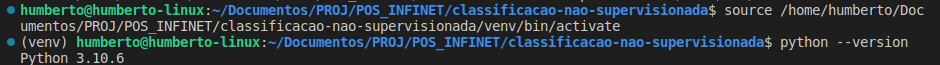

# Libs

## Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Cluster

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

## Data manipulation

In [ ]:
import pandas as pd
import os

## Data Request

In [ ]:
df = pd.read_csv('data/dataset.csv')

# Escolha da base

___________________________________________________________

1- Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
> Dados Bancários de empréstimos

2- Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
> Trabalhar com dados na área de finanças, buscando aumentar meus conhecimentos no ramo, tendo em vista meu campo de atuação em uma empresa do setor financeiro

3- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. 

In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4.120670e+06,4.120670e+06,4.120670e+06,4.120670e+06,4.120670e+06,4.120670e+06
mean,4.907833e+01,4.999149e+01,4.880729e+01,4.941343e+01,4.204558e+01,5.240059e+06
std,1.180251e+02,1.193862e+02,1.163993e+02,1.179184e+02,1.142766e+02,2.882202e+07
min,0.000000e+00,1.302100e-02,1.237000e-02,1.302100e-02,1.858731e-03,0.000000e+00
25%,7.863405e+00,8.474527e+00,8.243189e+00,8.360000e+00,4.120000e+00,4.428000e+05
50%,2.434667e+01,2.475000e+01,2.412500e+01,2.445500e+01,1.637348e+01,1.338500e+06
75%,5.343000e+01,5.403000e+01,5.281250e+01,5.345000e+01,4.289384e+01,3.563600e+06
max,5.977610e+03,5.982450e+03,5.884060e+03,5.959330e+03,5.959330e+03,7.421641e+09


<AxesSubplot: >

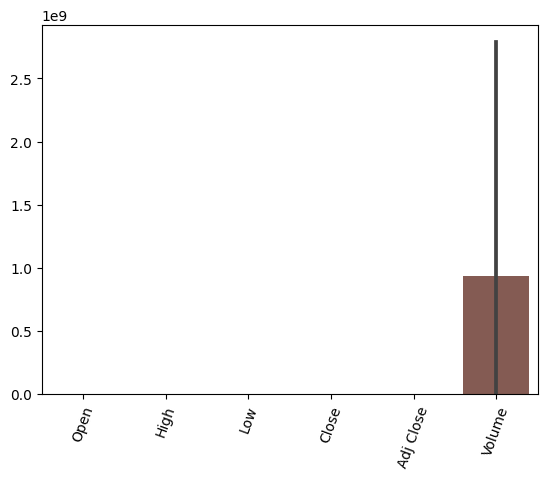

In [27]:
plt.xticks(rotation=70)
sns.barplot(data=df)

4- Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
> As variáveis possuem escalas diferentes, necessitando que seje feita a normalização dos dados, bem como a etapa de pre-processamento, a fim de tratar dados nulos, variáveis categóricas, limpeza de dados, análise gráfica, disposição dos valores, entre outros fatores necessários para que seja feita a correta realização da clusterização.

5- Realize o pré-processamento adequado dos dados. Descreva os passos necessários.
- Leitura dos dados;
- Análise de variáveis;
- Análise gráfica;
- Tratamento de variáveis categóricas;
- Tratamento dos dados nulos;
- Limpeza dos dados;
- Normalização

# Clusterização

____________________________________________________________

1- Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.
> Foi escolhido o número de cluster igual a 2, devido ao maior valor do índice de silhueta, bem como pelo comportamento da distribuição dos dados.

2 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
> Kmeans utiliza a técnica do centroid, classificando os pontos de acordo com sua proximidade ao ponto central mais perto. É necessário atribuir o número de cluster manualmente.
> Dbscan é pautado na ideia de densidade, com uma distância máxima de classificação predefinida. Encontrando assim o número de cluster de forma automática.

3 - Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.
> CVNN e DBCV

4 - Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?
> Não, pois no algoritmo do Dbscan o número de cluster é definido automaticamente de acordo com a distância dos pontos.

## Pre-Processamento

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
df.describe()

In [ ]:
df_encoding.dtypes

In [ ]:
df.nunique()

In [ ]:
df_encoding.isna().sum()

In [ ]:
df_encoding.dropna(inplace=True)

In [ ]:
def enconding(df, dumies=False):
    if dumies:
        return pd.get_dummies(df, columns=['age'])
    lb = LabelEncoder()
    df_encoding = df.copy()
    df_encoding['age'] = lb.fit_transform(df_encoding[['age']])
    return df_encoding

df_encoding = enconding(df)

In [ ]:
normalizer = Normalizer()
data_normalizer = normalizer.fit_transform(df_encoding)
df_normalizer = pd.DataFrame(data_normalizer)
df_normalizer

## Diminuição da dimensionalidade

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_normalizer)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

## Cluster

In [ ]:
from sklearn.cluster import DBSCAN

class Clustering:
    
    def __init__(self, data: pd.DataFrame, range_n_clusters: list):
        self.X = data
        self.range_n_clusters = range_n_clusters
        self.n_clusters = None
        self.centers = None
        self.cluster_labels = None
        self.silhouette_avg = None
        self.sample_silhouette_values = None

    def start(self, type_method='kmeans'):
        if type_method == 'kmeans':
            for self.n_clusters in self.range_n_clusters:
                self.handle_kmeans()
                self.handle_silhouettes()
                self.handle_plot()
                
        else:
            self.handle_dbscan()
        self.handle_silhouettes()
        self.handle_plot()
        plt.show()
        
    def handle_kmeans(self):
        clusterer = KMeans(n_clusters=self.n_clusters, n_init=10, random_state=10)
        self.cluster_labels = clusterer.fit_predict(self.X)
        self.centers = clusterer.cluster_centers_
        
    def handle_dbscan(self):
        clusterer = DBSCAN(eps=0.1, min_samples=5)
        self.cluster_labels = clusterer.fit_predict(self.X)
        serie_labels = pd.Series(labels)
        index = []
        for label in serie_labels.unique():
            index.append(serie_labels[serie_labels == label].index.tolist()[0])
        self.centers = db.components_[index]
        self.n_clusters = serie_labels.nunique()
        
    def handle_silhouettes(self):
        self.silhouette_avg = silhouette_score(self.X, self.cluster_labels)
        print(
            "For n_clusters =",
            self.n_clusters,
            "The average silhouette_score is :",
            self.silhouette_avg,
        )

        self.sample_silhouette_values = silhouette_samples(self.X, self.cluster_labels)
    
    def handle_plot(self):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(self.X) + (self.n_clusters + 1) * 10])
        y_lower = 10
        for i in range(self.n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = self.sample_silhouette_values[self.cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / self.n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=self.silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.n_clusters)
        ax2.scatter(
            # X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        
        ax2.scatter(
            self.centers[:, 0],
            self.centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )
        for i, c in enumerate(self.centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % self.n_clusters,
            fontsize=14,
            fontweight="bold",
        )
        

## Silhueta

### Kmeans

In [ ]:
Clustering(X, range_n_clusters).start(type_method='kmeans')

### Dbscan

In [ ]:
Clustering(X, range_n_clusters).start(type_method='dbscan')

## Informação mútua

### Kmeans

### Dbscan

## CVNN

### Kmeans

### Dbscan

## DBCV

### Kmeans

### Dbscan

# Medidas de similaridade

_________________________________________________________________________


1 - Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

Passo:
- Compara as séries em pares
- Mantém uma estática e a outra aplica um offset
- Calcula-se a correlação entre elas ao longo de todo o espaço de tempo
- Registra o valor de correlção e o offset utilizado
- Identifica o maior valor de correlação e qual o offset foi utilizado
- Ao final da correlação cruzada teremos a maior similaridade para um offset específico
- Esse comparativo é feito entre todas as séries
- O valor do sinal do offset identifica os sinais como leader-follower
- Separação das séries com maior sincronia

2 - Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

- Dbscan, pois a série temporal tende a comportamento de clusters com forma arbitrária, e não convexa, dificultando a classificação pelo método do Kmeans. Para esse tipo de dado o dbscan teria melhor desempenho, devido sua característica de classificação por vizinhança.

3 - Indique um caso de uso para essa solução projetada.

- Preço de ações

4 - Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

> DTW.

Passos:
- Compara as séries em pares
- Faz a corrensapondencia dos sinais pelas amplitudes
- Monta a matrix de distância aplicando as regras de custo do algorítimo
- A matriz resultará no cálculo do custo mínimo para os dois sinais terem a maior sincronia
- Pela matrix é possível identificar o leader-follower entre os sinais